In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import asarray
import tensorflow as tf
import cv2
import keras
import warnings
warnings.filterwarnings('ignore')

In [7]:
# To test the avilability of GPU!
print(tf.test.is_gpu_available())

False


In [8]:
print(tf.__version__)

1.3.0


In [9]:
keras.__version__

'2.1.3'

In [10]:
from keras.models import load_model
model = load_model('Model/facenet_keras.h5')

In [11]:
model.inputs

[<tf.Tensor 'input_1_1:0' shape=(?, 160, 160, 3) dtype=float32>]

In [12]:
model.outputs

[<tf.Tensor 'Bottleneck_BatchNorm_1/cond/Merge:0' shape=(?, 128) dtype=float32>]

In [13]:
# model.summary()

### Face Detection using MTCNN

In [258]:
import mtcnn

In [259]:
image1 = cv2.imread('images/santosh1.jpg')
image2 = cv2.imread('images/santosh2.jpg')
image3 = cv2.imread('images/santosh3.jpg')
image4 = cv2.imread('images/santosh4.jpeg')
image5 = cv2.imread('images/santosh image.JPG')

In [302]:
from mtcnn.mtcnn import MTCNN
from PIL import Image
mtcnn = MTCNN()

In [356]:
image4 = cv2.cvtColor(image4,cv2.COLOR_BGR2RGB)
cv2.namedWindow("Display", cv2.WINDOW_AUTOSIZE)   
cv2.imshow('Display',image4)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [329]:
# using asarray!
img_arr = asarray(image4)
img_arr.shape

(1440, 1440, 3)

In [330]:
# using np.array!
img_arr = np.array(image4)
img_arr.shape

(1440, 1440, 3)

In [331]:
box_result = mtcnn.detect_faces(img_arr)

In [332]:
box_result

[{'box': [811, 124, 242, 313],
  'confidence': 0.9999567270278931,
  'keypoints': {'left_eye': (882, 250),
   'right_eye': (990, 264),
   'nose': (926, 315),
   'mouth_left': (867, 350),
   'mouth_right': (979, 364)}}]

In [333]:
box_result[0]['box']

[811, 124, 242, 313]

In [334]:
x1, y1, width, height = box_result[0]['box']

In [335]:
x1, y1 = abs(x1), abs(y1)
x2, y2 = x1 + width, y + height

In [336]:
face = img_arr[y1:y2, x1:x2]

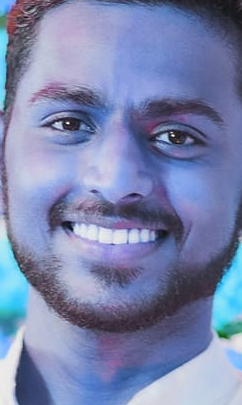

In [346]:
# One way to array to image!
cropped_face = Image.fromarray(face)
cropped_face 

In [347]:
face_array = np.array(face)
face_array.ravel()

array([110, 185, 254, ..., 196, 203, 220], dtype=uint8)

In [348]:
# Second is simple plt.imshow! but not shape or reshap !
# cropped_face = plt.imshow(face)
# cropped_face.shape

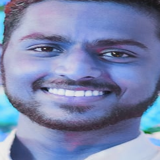

In [349]:
cropped_face_resize = cropped_face.resize((160,160))
cropped_face_resize

### Fucntion to Detect faces

In [370]:
def detect_face(filename,size=((160,160))):
    image = cv2.imread(filename)
#     cv2.imshow('Display',image)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image_arr = np.array(image)
    box_res = mtcnn.detect_faces(image_arr)
    x, y, width, height = box_res[0]['box']
    x1, y1, x2, y2 = abs(x), abs(y), x + width, y + height
    face = image_arr[y1:y2, x1:x2]
    cropped_face = Image.fromarray(face)
    cropped_face_resize = cropped_face.resize(size)
    face_array = np.array(cropped_face_resize)
    return face_array

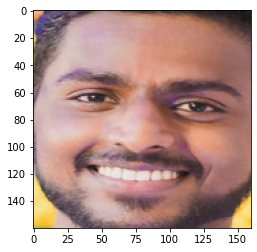

In [381]:
face = detect_face('images/santosh4.jpeg')
plt.imshow(face)